哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
Taipei = pd.read_csv("A_lvr_land_A.csv")
New_Taipei = pd.read_csv("F_lvr_land_A.csv")
Taichung = pd.read_csv("B_lvr_land_A.csv")
Kaohsiung = pd.read_csv("E_lvr_land_A.csv")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
Taipei = Taipei[1:]
New_Taipei = New_Taipei[1:]
Taichung = Taichung[1:]
Kaohsiung = Kaohsiung[1:]

In [4]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
Taipei["city"] = "Taipei"
New_Taipei["city"] = "New_Taipei"
Taichung["city"] = "Taichung"
Kaohsiung["city"] = "Kaohsiung"

In [5]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([Taipei, New_Taipei, Taichung, Kaohsiung],ignore_index=True)
data.shape

(59476, 33)

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [6]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [7]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
#tips: data.rename({"key1":value1,"key2":value2})
#data = data.rename(columns_mapping)
#data.columns
data = data.rename(columns=columns_mapping)
data.head()

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


In [8]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
data2 = data[(data["main_use"]=="住家用")&(data["use_zoning"]=="住")]
data3 = pd.DataFrame(data2, columns = analysis_columns)
data3 = data3.dropna()
data3.shape

(7802, 12)

In [9]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
print(data3.info())
display(data3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 57834
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB
None


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
4,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
6,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
7,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
57267,Kaohsiung,路竹區,住家用,住,5300000,140.10999999999999,86.24,1090718,37827,3,2,2
57361,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2
57578,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3
57626,Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392,3,2,2


In [10]:
data4 = data3.copy().reset_index(drop=True)
data4["building_area_square_meter"] = data4["building_area_square_meter"].astype("float64")
data4["main_building_area"] = data4["main_building_area"].astype("float64")
data4["total_price"] = data4["total_price"].astype("int")
data4["unit_price"] = data4["unit_price"].astype("int")
data4["room_number"] = data4["room_number"].astype("int")
data4["hall_number"] = data4["hall_number"].astype("int")
data4["health_number"] = data4["health_number"].astype("int")
print(data4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7802 entries, 0 to 7801
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int32  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   int32  
 9   room_number                 7802 non-null   int32  
 10  hall_number                 7802 non-null   int32  
 11  health_number               7802 non-null   int32  
dtypes: float64(2), int32(5), object(5)
memory usage: 579.2+ KB
None


In [11]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引，括號內可以用ignore_index = True，但這邊不好用

L = []
for i in range(0,len(data4)):
    L.append(data4["tx_dt"].values[i][0:3])
L = pd.Series(L)
data4["tx_dt_year"] = L

data5 = data4[(data4["tx_dt_year"]=="109")&(data4["room_number"]<=5)&(data4["room_number"]>0)
              &(data4["hall_number"]<=2)&(data4["hall_number"]>0)].reset_index(drop=True)
data5

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765,4,1,2,109
6890,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827,3,2,2,109
6891,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2,109
6892,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3,109


# 3. 建立自定義特徵加入分析

以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [12]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

data5["building_area_square_feet"] = data5["building_area_square_meter"]*0.3025
data5["main_building_area_square_feet"] = data5["main_building_area"]*0.3025
data5["unit_price_square_feet"] = data5["unit_price"]/0.3025

In [13]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
display(data5.describe())
#1. main_building_area, unit_price, main_building_area_square_feet, unit_price_square_feet出現最小值為零的異常
#2. 根據內政部不動產實價查詢台北市松山區，單價元坪可達239萬元，故平均17.5萬應屬正常

data6 = data5[(data5["main_building_area"]>0)&(data5["unit_price"]>0)&
             (data5["main_building_area_square_feet"]>0)&(data5["unit_price_square_feet"]>0)]
data6

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2,109,9.123400,7.910375,241137.190083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765,4,1,2,109,24.327050,24.327050,147983.471074
6890,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827,3,2,2,109,42.383275,26.087600,125047.933884
6891,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2,109,43.789900,30.782400,115322.314050
6892,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3,109,63.760950,43.681000,42657.851240


In [14]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
data6.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149,36.834942,24.976132,3.125569e+05
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869,19.011854,11.174478,1.929742e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000,25.111281,18.471406,1.771810e+05
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000,33.095012,23.930775,2.636116e+05
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000,44.602112,29.030925,3.929917e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [15]:
# 複習
# 離散對離散
# 1. table = pd.crosstab(a, b), df = min(table.shape[0],table.shape[0]) - 1
# 2. crosstab, res = researchpy.crosstab(a, b, test="chi-square"), v = res.loc[2,"results"]
# 3. 根據自由度，會有不同標準

# 連續對離散
# 1. import pingouin as pg
# 使用pg.anova(data, dv, between, ss_type, detailed, effsize='np2')
# (pd.DatFrame, 某列獨立變數, between-subject factor(s), 針對不平衡設計的平方和求法, 是否詳細列ANOVA表, 效應值(此限定為n2或np2))
# 這邊因為eta-squared(n2) = SSeffect / SSTotal = SSBetween / SSTotal = SStrt / SST
# partial eta square(np2) = SSeffect / (SSeffect+SSerror) = SSt / (SSt + SSE)
# 而當只有單變數(單尾)ANOVA時，SSt + SSE = SST，此時np2 = n2
# 2. anova_table = pg.anova(dv, between, data, detailed=True)
# 3. n2 = anova_table.SS[0] / (anova_table.SS[0]+anova_table.SS[1])，根據n2大小判斷

# 連續對連續
# 1. corr, pvalue = stats.pearsonr(某列獨立變數a,某列獨立變數b)

In [16]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
# 要先知道測量變數是總價，其產生的推算變數有單位元坪、單價元坪，平方單位變數不考慮，剩下房、廳、衛、建物移轉總面積坪、主建物面積坪
# 通通是連續對連續
tp = data6[data6["city"]=="Taipei"]
from scipy import stats
result = stats.pearsonr(tp["room_number"],tp["total_price"])
result2 = stats.pearsonr(tp["hall_number"],tp["total_price"])
result3 = stats.pearsonr(tp["health_number"],tp["total_price"])
result4 = stats.pearsonr(tp["building_area_square_feet"],tp["total_price"])
result5 = stats.pearsonr(tp["main_building_area_square_feet"],tp["total_price"])
result6 = stats.pearsonr(tp["unit_price_square_feet"],tp["total_price"])
print("與總價相關性：\n房:",f"{result}","\n廳:",f"{result2}","\n衛:",f"{result3}",
      "\n建物移轉總面積坪:",f"{result4}","\n主建物面積坪:",f"{result5}","\n單價元坪:",f"{result6}")
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
result7 = stats.pearsonr(tp["room_number"],tp["unit_price_square_feet"])
result8 = stats.pearsonr(tp["hall_number"],tp["unit_price_square_feet"])
result9 = stats.pearsonr(tp["health_number"],tp["unit_price_square_feet"])
result10 = stats.pearsonr(tp["building_area_square_feet"],tp["unit_price_square_feet"])
result11 = stats.pearsonr(tp["main_building_area_square_feet"],tp["unit_price_square_feet"])
print("與單價元坪相關性：\n房:",f"{result7}","\n廳:",f"{result8}","\n衛:",f"{result9}",
      "\n建物移轉總面積坪:",f"{result10}","\n主建物面積坪:",f"{result11}")

與總價相關性：
房: (0.326441400190993, 1.5741573484946354e-35) 
廳: (0.27078673622229565, 1.4974349832174644e-24) 
衛: (0.5988317082017813, 1.1294445449805117e-134) 
建物移轉總面積坪: (0.8646266775371656, 0.0) 
主建物面積坪: (0.7105154108206191, 5.969136685890878e-212) 
單價元坪: (0.5812901524655661, 3.4926559701817947e-125)
與單價元坪相關性：
房: (-0.10006239729545577, 0.0002010269087446392) 
廳: (0.004883414682447875, 0.856380017736484) 
衛: (0.12821692845522709, 1.8283754113659303e-06) 
建物移轉總面積坪: (0.2181852680646949, 2.724918739541817e-16) 
主建物面積坪: (0.11248847297456453, 2.8871643465517586e-05)


### 僅建物移轉總面積坪、主建物面積坪與總價呈現高度相關

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

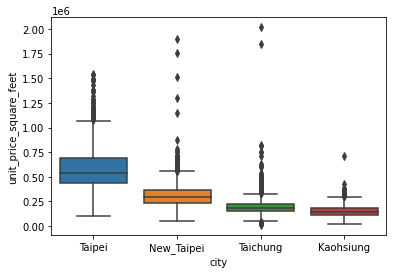

In [17]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=data6['city'],y=data6['unit_price_square_feet'])
#台北中位數最高

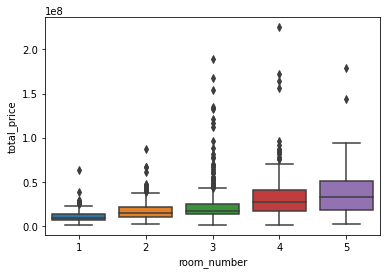

In [18]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
data7 = data6[data6['city']=="Taipei"]
sns.boxplot(data=data7, x=data7["room_number"], y=data7['total_price'])
#5房的中位數最高

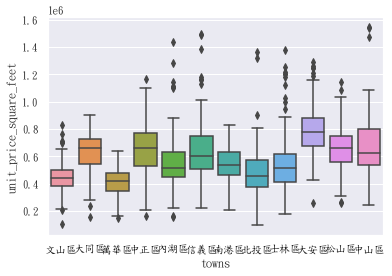

In [35]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
#將地區轉換成連續型資料
data8 = data7.copy()
data8["towns"]=Le.fit_transform(data8["towns"])
data8["towns"]=Le.inverse_transform(data8["towns"])

#解決中文字型問題
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname=r'C:/Windows/Fonts/kaiu.ttf')
sns.set(font=myfont.get_name())

sns.boxplot(x=data8["towns"],y=data8["unit_price_square_feet"])